In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\deepe\OneDrive\Desktop\Python Datasets\HR Analytics"

C:\Users\deepe\OneDrive\Desktop\Python Datasets\HR Analytics


In [3]:
hrtrain=pd.read_csv("train_LZdllcl.csv")

In [4]:
hrtest=pd.read_csv("test_2umaH9m.csv")

In [5]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
hrtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
# add dependent variable to test data temporarirly
hrtest['is_promoted']='test'

In [8]:
# concat both dataframes for preprocessing
combinedf=pd.concat([hrtrain,hrtest],axis=0) # row wise concatenation

In [9]:
# impute missing values in education
combinedf.education.value_counts(dropna=False)

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [10]:
combinedf.education=combinedf.education.fillna("Bachelor's")

In [11]:
combinedf.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [12]:
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3.0)

In [13]:
# how many employees got promoted. create pie chart
# how many male and female employees are there, create pie chart
# how many employees won awards? create pie chart
# how many employees met KPI's? create pie chart

<Axes: ylabel='is_promoted'>

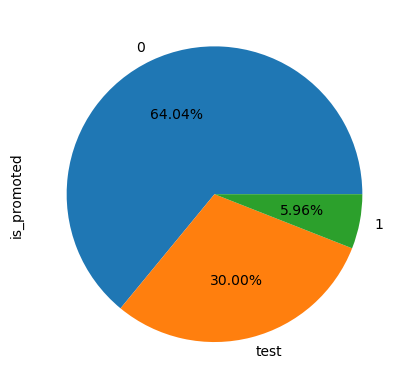

In [14]:
# how many employees got promoted. create pie chart
combinedf.is_promoted.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='gender'>

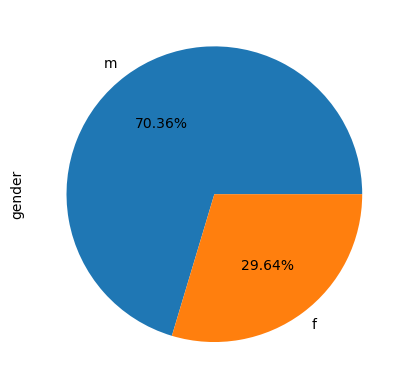

In [15]:
# how many male and female employees are there, create pie chart
combinedf.gender.value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='awards_won?'>

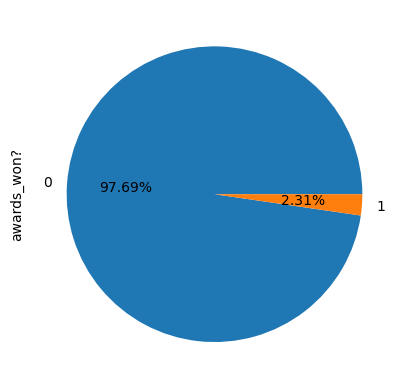

In [16]:
# how many employees won awards? create pie chart
combinedf['awards_won?'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='KPIs_met >80%'>

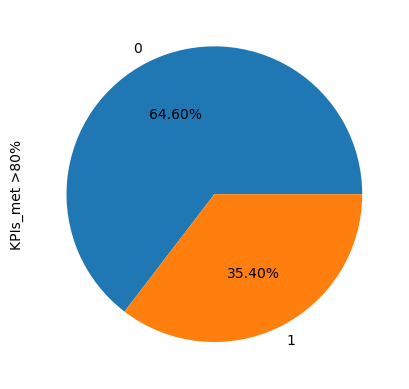

In [17]:
# how many employees met KPI's? create pie chart
combinedf['KPIs_met >80%'].value_counts().plot(kind='pie',autopct='%.2f%%')

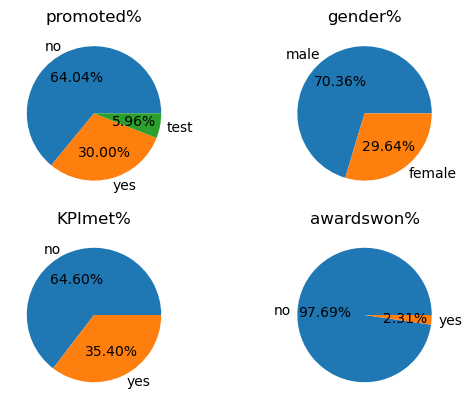

In [18]:
# how many employees got promoted. create pie chart
# how many male and female employees are there, create pie chart
# how many employees won awards? create pie chart
# how many employees met KPI's? create pie chart
fig,axes=plt.subplots(2,2)
axes=axes.flatten()
axes[0].pie(combinedf.is_promoted.value_counts(),autopct='%.2f%%',
           labels=['no','yes','test'])
axes[0].set_title("promoted%")
axes[1].pie(combinedf.gender.value_counts(),autopct='%.2f%%',
           labels=['male','female'])
axes[1].set_title("gender%")
axes[2].pie(combinedf["KPIs_met >80%"].value_counts(),autopct='%.2f%%',
           labels=['no','yes'])
axes[2].set_title("KPImet%")
axes[3].pie(combinedf["awards_won?"].value_counts(),autopct='%.2f%%',
           labels=['no','yes'])
axes[3].set_title("awardswon%")
plt.show()

In [19]:
# cross tabulations - stacked bar plot
# how many male& female employees got promoted
# how many employees who won awards got promoted
# how many employees in each department got promoted
# how many employees got promoted with relation to education

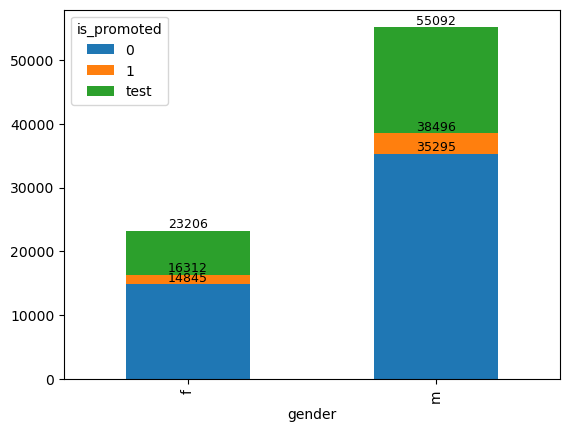

In [20]:
# how many male& female employees got promoted
pf=pd.crosstab(combinedf.gender,combinedf.is_promoted)
ax=pf.plot.bar(stacked=True)
for i in ax.containers:
    ax.bar_label(i,fontsize=9)

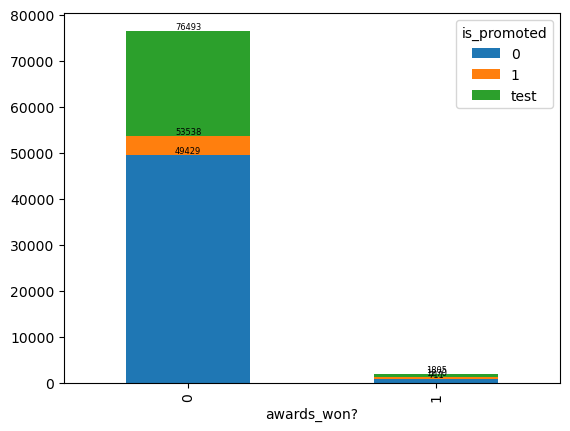

In [21]:
# how many employees who won awards got promoted
pf=pd.crosstab(combinedf['awards_won?'],combinedf.is_promoted)
ax=pf.plot.bar(stacked=True)
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

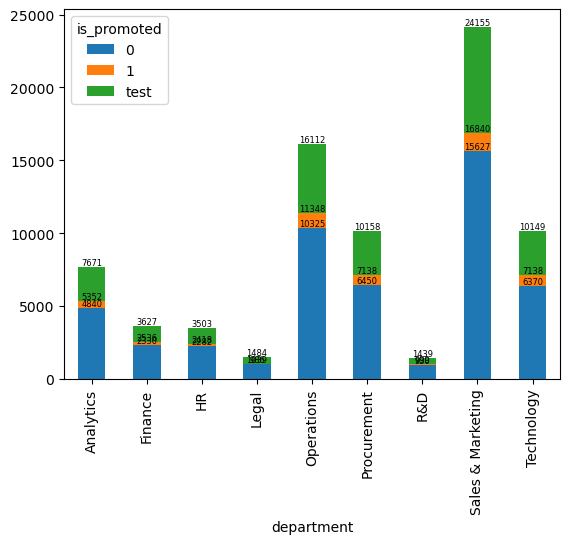

In [22]:
# how many employees in each department got promoted
pf=pd.crosstab(combinedf.department,combinedf.is_promoted)
ax=pf.plot.bar(stacked=True)
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

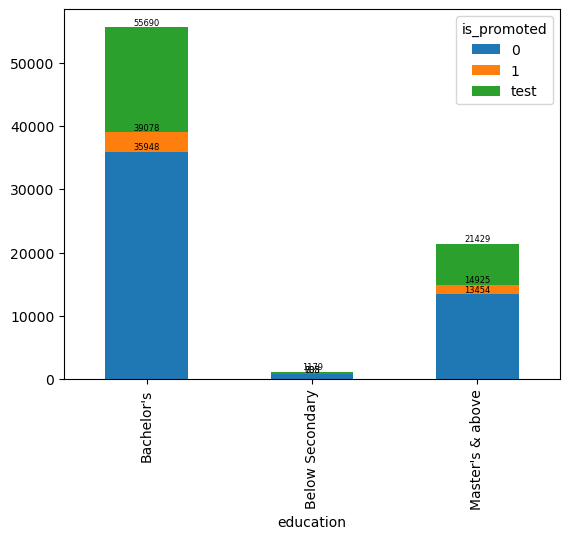

In [23]:
# how many employees got promoted with relation to education
pf=pd.crosstab(combinedf.education,combinedf.is_promoted)
ax=pf.plot.bar(stacked=True)
for i in ax.containers:
    ax.bar_label(i,fontsize=6)

<Axes: xlabel='education'>

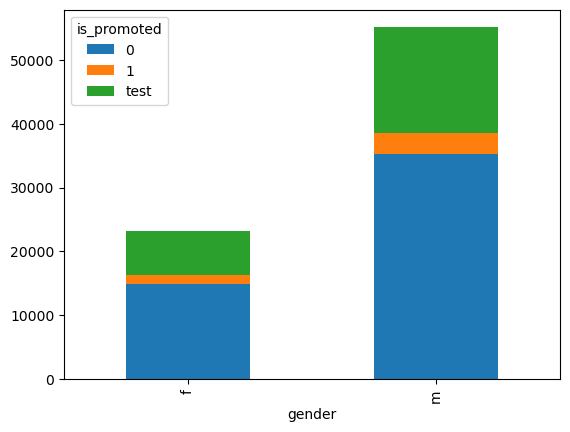

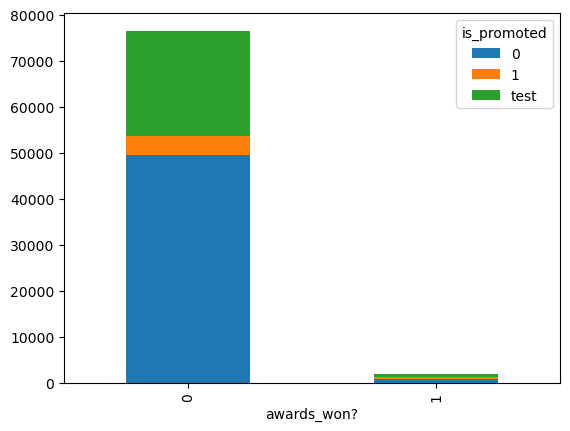

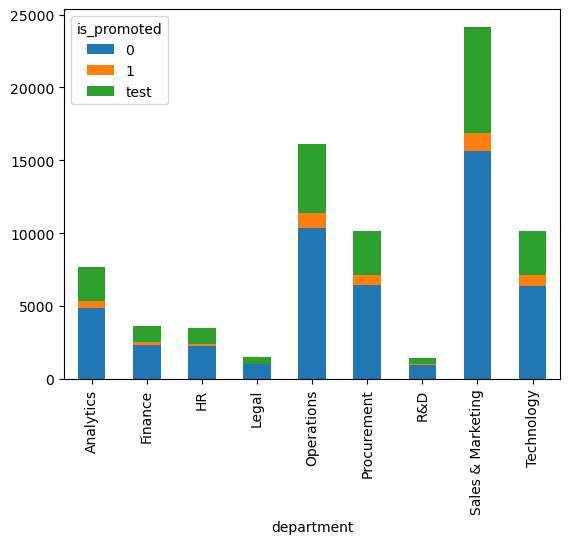

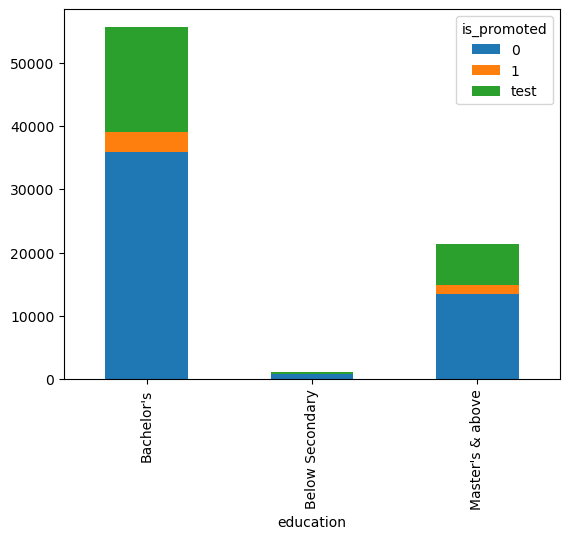

In [24]:
# cross tabulations - stacked bar plot
# how many male& female employees got promoted
# how many employees who won awards got promoted
# how many employees in each department got promoted
# how many employees got promoted with relation to education
pd.crosstab(combinedf.gender,combinedf.is_promoted).plot.bar(stacked=True)
pd.crosstab(combinedf['awards_won?'],
            combinedf.is_promoted).plot.bar(stacked=True)
pd.crosstab(combinedf.department,
            combinedf.is_promoted).plot.bar(stacked=True)
pd.crosstab(combinedf.education,
            combinedf.is_promoted).plot.bar(stacked=True)

In [25]:
combinedf.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [26]:
chrcols=combinedf[['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?']]

In [27]:
numcols=combinedf[['no_of_trainings', 'age','length_of_service','avg_training_score', 'is_promoted']]

In [28]:
chrcols_dummy=pd.get_dummies(chrcols,columns=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?'])

In [29]:
combinedf_clean=pd.concat([numcols,chrcols_dummy],axis=1)

In [30]:
# for EVA split emobinedf into train & test
hrtraindf=combinedf_clean[combinedf_clean.is_promoted!='test']
hrtestdf=combinedf_clean[combinedf_clean.is_promoted=='test']

In [31]:
# use hrtraindf for EDA
# what is the average avg_traoning_score of is_promoted 0 & 1?
# what is the average length_of_service of is_promoted 0 & 1?
# what is the average avg_training_score of  male and female?
# what is the average length_of_service of male & female?
# what is the average avg_training_score of different depaartments?
# what is the average length_of_service of awardswon?

In [32]:
# what is the average avg_traoning_score of is_promoted 0 & 1?
hrtraindf.avg_training_score.groupby(hrtraindf.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [33]:
# what is the average length_of_service of is_promoted 0 & 1?
hrtraindf.length_of_service.groupby(hrtraindf.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [34]:
# what is the average avg_training_score of  male and female?
hrtraindf.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [35]:
# what is the average length_of_service of male & female?
hrtraindf.length_of_service.groupby(hrtrain.gender).mean()

gender
f    5.994421
m    5.810889
Name: length_of_service, dtype: float64

In [36]:
# what is the average avg_training_score of different depaartments?
hrtraindf.avg_training_score.groupby(hrtrain.department).mean().sort_values(ascending=False)

department
Analytics            84.602952
R&D                  84.596597
Technology           79.928692
Procurement          70.122443
Operations           60.226648
Finance              60.222003
Legal                59.868142
Sales & Marketing    50.261698
HR                   50.018197
Name: avg_training_score, dtype: float64

In [37]:
# what is the average length_of_service of awardswon?
hrtraindf.length_of_service.groupby(hrtrain['awards_won?']).mean()

awards_won?
0    5.891740
1    4.759843
Name: length_of_service, dtype: float64

In [38]:
#Test Null Average avg_testing_score of is_predicted 0 & 1 equal
#Test Null Average avg_training_score of male and female equal
#Test Null Average avg_length_of_services of different education equal
#Test Null Average avg_training_score of different education equal
#Test Null No association between is_promoted and gender
#Test Null No association between is_promoted and department
#Tesr Null No association between is_promoted and KPIs_met >80%

In [39]:
promotedyes=hrtraindf[hrtrain.is_promoted==1]
promotedno=hrtraindf[hrtrain.is_promoted==0]

In [40]:
from scipy.stats import ttest_ind

In [41]:
#Test Null Average avg_testing_score of is_predicted 0 & 1 equal
ttest_ind(promotedyes.avg_training_score,promotedno.avg_training_score,equal_var=False)
# since pvalue=7.662329172468838e-291 is less than 0.05, reject null
# null - no significant difference in average avg_traing_score of promoted 0 & 1

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [42]:
#Test Null Average avg_training_score of male and female equal
male=hrtraindf[hrtrain.gender=="m"]
female=hrtraindf[hrtrain.gender=="f"]

In [43]:
ttest_ind(male.avg_training_score,female.avg_training_score,equal_var=False)
# since pvalue=9.321257169457854e-10 is lees than 0.05, reject null
# null - no significant difference in average avg_training_score of gender male & female

Ttest_indResult(statistic=-6.122262326710494, pvalue=9.321257169457854e-10)

In [44]:
#Test Null Average avg_length_of_services of different education equal
bachelor=hrtraindf[hrtrain.education=="Bachelor's"]
master=hrtraindf[hrtrain.education=="Master's & above"]
belowsecondary=hrtraindf[hrtrain.education=="Below Secondary"]

In [45]:
from scipy.stats import f_oneway

In [46]:
f_oneway(bachelor.length_of_service,master.length_of_service,belowsecondary.length_of_service)
# since pvalue=0.0 is less then 0.05, reject null
# null - no significant difference in average length_of_service of education level

F_onewayResult(statistic=2027.4315687843416, pvalue=0.0)

In [47]:
#Test Null Average avg_training_score of different education equal
hrtraindf.avg_training_score.groupby(hrtrain.education).mean()

education
Bachelor's          63.422046
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

In [48]:
f_oneway(bachelor.avg_training_score,master.avg_training_score,belowsecondary.avg_training_score)
#Since pvalue=2.873996658407989e-15 is less than 0.05 reject null

F_onewayResult(statistic=16.15973895018542, pvalue=9.640024588823138e-08)

In [49]:
#Test Null No association between is_promoted and gender
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [50]:
from scipy.stats import chi2_contingency

In [51]:
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.gender))
#Since p-value=0.009765091521176657 is less than 0.05, reject null

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428, 35217.29382572],
       [ 1389.29382572,  3278.70617428]]))

In [52]:
#Test Null No association between is_promoted and department
pd.crosstab(hrtrain.is_promoted,hrtrain.department)

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
is_promoted,,,,,,,,,
0,4840,2330,2282,986,10325,6450,930,15627,6370
1,512,206,136,53,1023,688,69,1213,768


In [53]:
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.department))
#Since p-value=9.882497107474489e-29 less than 0.05 reject null

Chi2ContingencyResult(statistic=151.42635516323872, pvalue=9.882497107474489e-29, dof=8, expected_freq=array([[ 4896.1699022 ,  2320.00875785,  2212.05882353,   950.50831995,
        10381.49029339,  6530.05619618,   913.91512188, 15405.73638885,
         6530.05619618],
       [  455.8300978 ,   215.99124215,   205.94117647,    88.49168005,
          966.50970661,   607.94380382,    85.08487812,  1434.26361115,
          607.94380382]]))

In [54]:
#Test Null No association between is_promoted and KPIs_met >80%
pd.crosstab(hrtrain.is_promoted,hrtrain['KPIs_met >80%'])

KPIs_met >80%,0,1
is_promoted,,
0,34111,16029
1,1406,3262


In [55]:
chi2_contingency(pd.crosstab(combinedf.is_promoted,combinedf['KPIs_met >80%']))
#Since p-value=0.0 is leaa than 0.05 reject null

Chi2ContingencyResult(statistic=2687.247966005458, pvalue=0.0, dof=2, expected_freq=array([[32388.83394212, 17751.16605788],
       [ 3015.3784771 ,  1652.6215229 ],
       [15173.78758078,  8316.21241922]]))

In [56]:
# split data into X(independent variables) & y(dependent variable)
y=hrtraindf.is_promoted
X=hrtraindf.drop('is_promoted',axis=1)

In [57]:
# label encode dependent variabe y
from sklearn.preprocessing import LabelEncoder

In [58]:
y=LabelEncoder().fit_transform(y)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logit=LogisticRegression(max_iter=3000)

In [61]:
# convergence warning - all the coefficients (B's) in the model were not 
#                                     calculated as the number of iterations were not sufficient.

In [62]:
logitmodel=logit.fit(X,y)

In [63]:
logitmodel.score(X,y) # accuracy from confusion matrix

0.9323273974602247

In [64]:
logitpredict=logitmodel.predict(X)

In [65]:
pd.crosstab(y,logitpredict) # cross tabulation of actual & predicted class

col_0,0,1
row_0,,
0,49842,298
1,3411,1257


In [66]:
(49841+1260)/(49841+299+3408+1260) # (TP+TN)/(TP+FP+FN+TN)

0.9323638884834331

In [67]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay

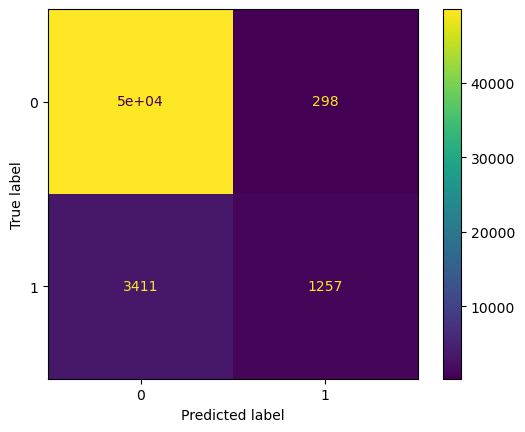

In [68]:
ConfusionMatrixDisplay.from_predictions(y,logitpredict)

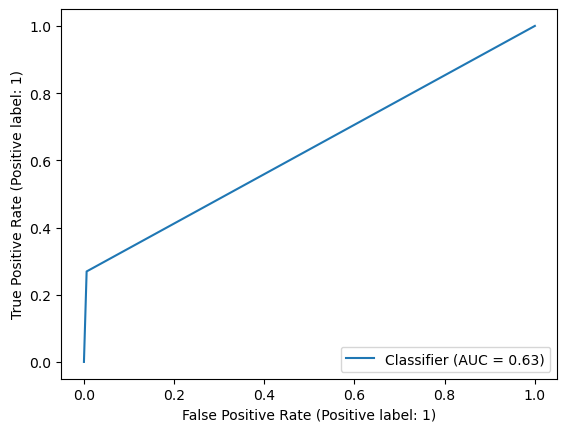

In [69]:
RocCurveDisplay.from_predictions(y,logitpredict)

In [70]:
print(classification_report(y,logitpredict))
# imbalance data is where dependent variable classes have huge difference
#                                                               0 - 50140 (Majority class)
#                                                               1 - 4668 (Minority class)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     50140
           1       0.81      0.27      0.40      4668

    accuracy                           0.93     54808
   macro avg       0.87      0.63      0.68     54808
weighted avg       0.93      0.93      0.92     54808



In [71]:
np.round(logitmodel.predict_proba(X),2)

array([[0.77, 0.23],
       [0.96, 0.04],
       [0.98, 0.02],
       ...,
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [72]:
logitpredict

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
logitmodel.intercept_

array([-21.11961125])

In [74]:
pd.set_option("display.max_rows",65)
pd.DataFrame(logitmodel.coef_,columns=X.columns).transpose()

,0
no_of_trainings,-0.238326
age,-0.021396
length_of_service,0.005609
avg_training_score,0.295121
department_Analytics,-5.064258
...,...
length_of_service_37,-0.016944
KPIs_met >80%_0,-0.985019
KPIs_met >80%_1,0.864370
awards_won?_0,-0.819300


In [75]:
hrtestdf=hrtestdf.drop('is_promoted',axis=1)

In [76]:
logittestpredict=logitmodel.predict(hrtestdf)

In [77]:
pd.DataFrame(logittestpredict).to_csv("logit.csv")

In [78]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [79]:
X1=hrtrain[['no_of_trainings', 'age','length_of_service','length_of_service',]]

In [80]:
logitmodel12=logit.fit(X1,y)

In [81]:
logitmodel12.score(X1,y)

0.9148299518318493

In [82]:
logitmodel12.intercept_

array([-1.8272672])

In [83]:
pd.DataFrame(logitmodel12.coef_,columns=X1.columns).transpose()

,0
no_of_trainings,-0.178269
age,-0.009611
length_of_service,0.000420
length_of_service,0.000420
